In [ ]:
# KMEANS exercise

import matplotlib.pyplot as plt
import pandas
import numpy
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
# Load Sklearn IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Use pandas to display the data
pd_data = pandas.DataFrame(data=iris.data, columns=iris.feature_names)
pd_data.head(200)

In [ ]:
# Create an instance of K-Means
n = 3
kmc = KMeans(n_clusters=n, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

# Fit and make predictions
# the function returns the array of cluster labels earch dat point belongs to
y_kmc = kmc.fit_predict(X)

In [ ]:
# Show the original data
plt.scatter(X[:, 0], X[:, 1], c=y_kmc, s=50, cmap='viridis')
# Show the clusters
centers = kmc.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5, label='centroids');

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

PART 1

The code above plots feature '0' versus feature '1'
Write a piece of code (with a for loop) to plot all 4 data features versus each other together with the centroids !

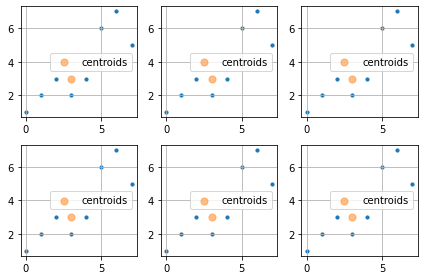

In [22]:
# Here is how you can make a grid of plots with subplots
# Use this code to show plot all the dimensions of the iris dataspace !

import matplotlib.pyplot as plt
rows = 2
columns = 3
fig, ax = plt.subplots(rows, columns)

# phoney data
sampledata = [1,2,3,2,3,6,7,5]
# indeces of that data ...0 to length of sample data
ls = list(range(0, len(sampledata)))

# axes are in a two-dimensional array, indexed by [row, col]
for i in range(rows):
    for j in range(columns):
        ax[i,j].scatter(ls, sampledata, s=10, cmap='viridis')
        ax[i,j].scatter(3, 3,  s=50, alpha=0.5, label='centroids')
        ax[i,j].legend()
        ax[i,j].grid()

fig.tight_layout()
plt.show()

PART 2

Experiment with different color reductions.
How low can you go before the image deteriorates noticeably?
Check on your mobile phone...

In [23]:
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 

# Pick a different image
url = 'https://upload.wikimedia.org/wikipedia/en/f/fe/PilatusNearLucernFromAbove.jpg'

In [24]:
image = io.imread(url) 
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
shape = image_rgb.shape
data = image / 255.0   # use 0...1 scale
data = data.reshape(shape[0]*shape[1], shape[2])
print(data.shape)

(8185344, 3)


In [32]:
#now lets use only N colors
from sklearn.cluster import MiniBatchKMeans

N = 10

kmeans = MiniBatchKMeans(N)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

In [ ]:
image_rgb_recolored = new_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(image_rgb_recolored)
ax[1].set_title('Compressed Image', size=16);

In [ ]:
# Save the image to your google drive and then transfer to your phone for a visual check

# Mount the drive - 
import os, sys 

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Adust this to your own setup
start = '/content/drive/MyDrive/'
datapath = start + 'data/'

# Save the compressed image
compressed_image = datapath + "compressed_image.jpg"
fig.savefig(compressed_image)

print("Directory content after saving image:")  
print(os.listdir(datapath))